## Preparing the dataset 

In [43]:
import pandas as pd 

airQualityData = pd.read_csv('station_hour.csv') #or checkout the dataset on kaggle: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india?select=station_hour.csv


C:\Users\cleyc\AppData\Local\Temp\ipykernel_640\1099558745.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  airQualityData = pd.read_csv('station_hour.csv') #or checkout the dataset on kaggle: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india?select=station_hour.csv


In [44]:
airQualityData['StationId'].unique()

# A lot of stations to choose from - preferably we will choose the one with the most in it 

array(['AP001', 'AP005', 'AS001', 'BR005', 'BR006', 'BR007', 'BR008',
       'BR009', 'BR010', 'CH001', 'DL001', 'DL002', 'DL003', 'DL004',
       'DL005', 'DL006', 'DL007', 'DL008', 'DL009', 'DL010', 'DL011',
       'DL012', 'DL013', 'DL014', 'DL015', 'DL016', 'DL017', 'DL018',
       'DL019', 'DL020', 'DL021', 'DL022', 'DL023', 'DL024', 'DL025',
       'DL026', 'DL027', 'DL028', 'DL029', 'DL030', 'DL031', 'DL032',
       'DL033', 'DL034', 'DL035', 'DL036', 'DL037', 'DL038', 'GJ001',
       'HR011', 'HR012', 'HR013', 'HR014', 'JH001', 'KA002', 'KA003',
       'KA004', 'KA005', 'KA006', 'KA007', 'KA008', 'KA009', 'KA010',
       'KA011', 'KL002', 'KL004', 'KL007', 'KL008', 'MH005', 'MH006',
       'MH007', 'MH008', 'MH009', 'MH010', 'MH011', 'MH012', 'MH013',
       'MH014', 'ML001', 'MP001', 'MZ001', 'OD001', 'OD002', 'PB001',
       'RJ004', 'RJ005', 'RJ006', 'TG001', 'TG002', 'TG003', 'TG004',
       'TG005', 'TG006', 'TN001', 'TN002', 'TN003', 'TN004', 'TN005',
       'UP012', 'UP0

In [45]:
#But first we have to clean the dataset..

airQualityData.isna().mean()

#Welp time to weed out the ones with more than 30% null 


StationId     0.000000
Datetime      0.000000
PM2.5         0.250162
PM10          0.432297
NO            0.213864
NO2           0.204309
NOx           0.189568
NH3           0.477628
CO            0.192849
SO2           0.286873
O3            0.280398
Benzene       0.332774
Toluene       0.402600
Xylene        0.801482
AQI           0.220229
AQI_Bucket    0.220229
dtype: float64

In [46]:
for column in airQualityData.columns.tolist():
    if airQualityData[column].isna().mean() > 0.3: 
        airQualityData = airQualityData.drop([column], axis = 1)
        print(column, 'is dropped')

airQualityData.columns

PM10 is dropped
NH3 is dropped
Benzene is dropped
Toluene is dropped
Xylene is dropped


Index(['StationId', 'Datetime', 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3',
       'AQI', 'AQI_Bucket'],
      dtype='object')

In [47]:
# Fill the current NA with the average

airQualityData = airQualityData.fillna(airQualityData.mean(numeric_only = True))

#Alright the data should now be usable! 

import seaborn as sns 

data = ['', 0]

for station in airQualityData['StationId'].unique().tolist():
    count = len(airQualityData.loc[airQualityData['StationId'] ==  station])
    if count > data[1]:
        data[0] = station
        data[1] = count

data

#We're going to stick with DL007 station specifically for this since it has the most samples to work with 

['DL007', 48192]

In [48]:
DL007Data = airQualityData.loc[airQualityData['StationId'] ==  'DL007']

DL007Data = DL007Data.sort_values(by = 'Datetime', ascending = True).drop(['AQI_Bucket', 'StationId'], axis = 1).reset_index(drop = True)

DL007Data['Datetime'] = pd.to_datetime(DL007Data['Datetime'])
DL007Data = DL007Data.set_index('Datetime')


DL007Data.head()

#With this, the dataset should be ready for a model 

,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI
Datetime,,,,,,,,
2015-01-01 01:00:00,598.51,69.03,35.69,104.72,0.58,12.116025,108.020000,180.173027
2015-01-01 02:00:00,655.93,80.36,35.58,115.94,0.55,12.116025,121.380000,180.173027
2015-01-01 03:00:00,657.68,94.69,35.45,130.13,0.51,12.116025,38.064085,180.173027
2015-01-01 04:00:00,690.24,88.06,35.51,123.57,0.53,12.116025,38.064085,180.173027
2015-01-01 05:00:00,625.27,70.91,35.82,106.74,0.58,12.116025,38.064085,180.173027


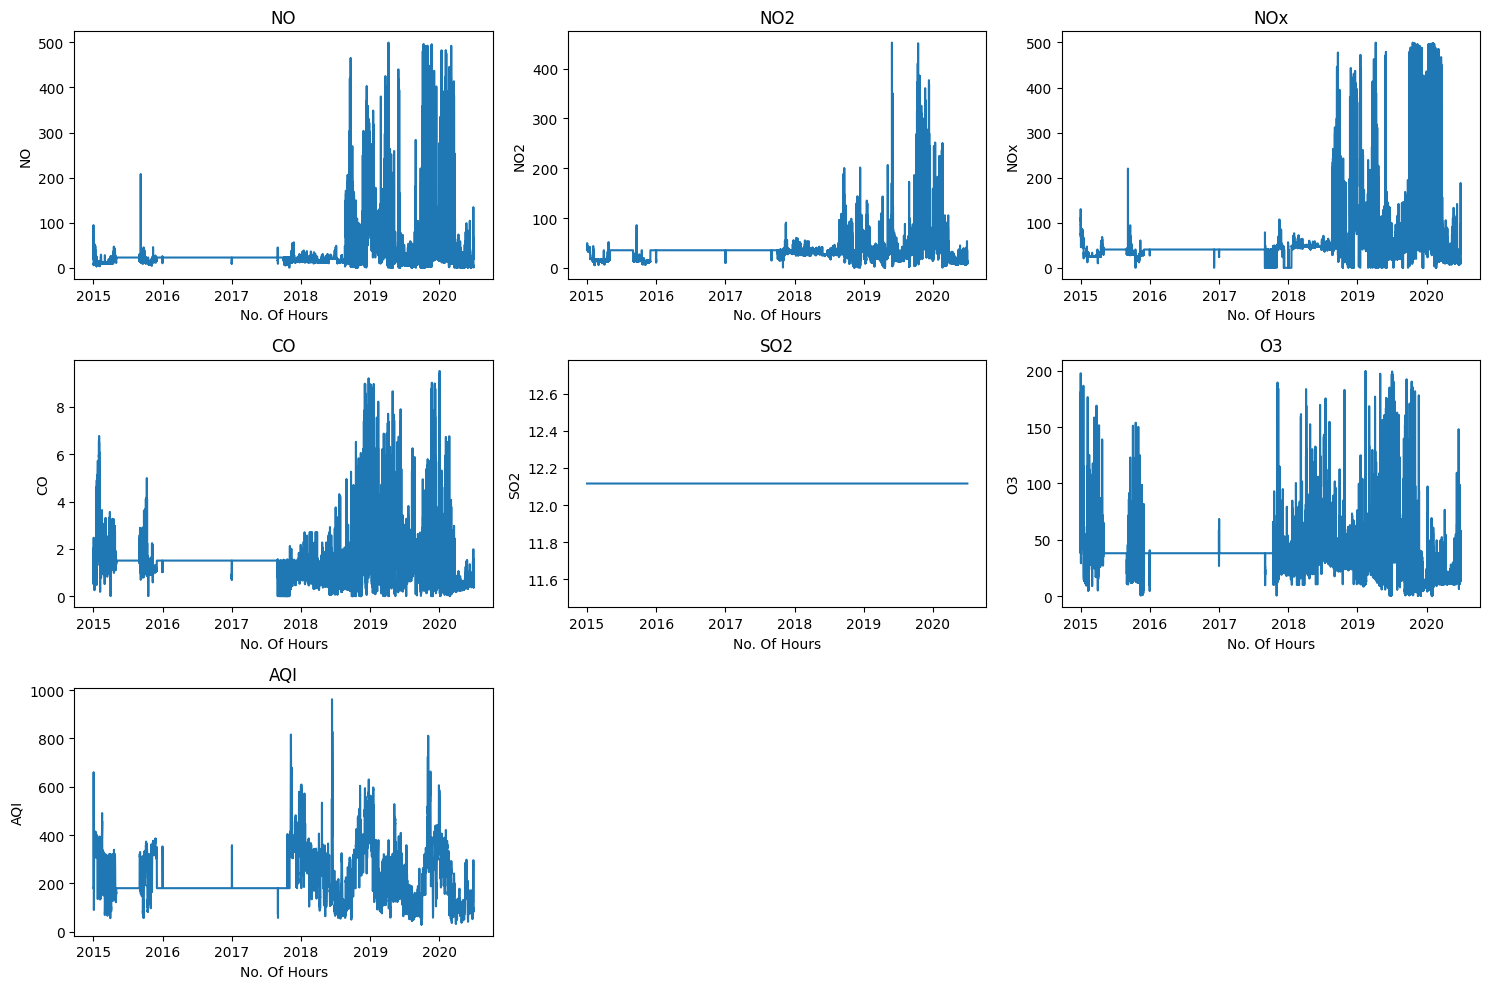

In [49]:
# A quick graph representation to get a good idea of the overall dataset

from matplotlib import pyplot as plt 

plt.figure(figsize=(15,10))

for index, column in enumerate(DL007Data.columns.tolist()[1:]):
    plt.subplot(3, 3, index + 1)
    plt.plot(DL007Data[column])
    plt.xlabel('No. Of Hours')
    plt.ylabel(column)
    plt.title(column)


plt.tight_layout()
plt.show()

#Judging from here there was a gap that needs to be addressed since the line clearly indicates the area that the fillna filled.

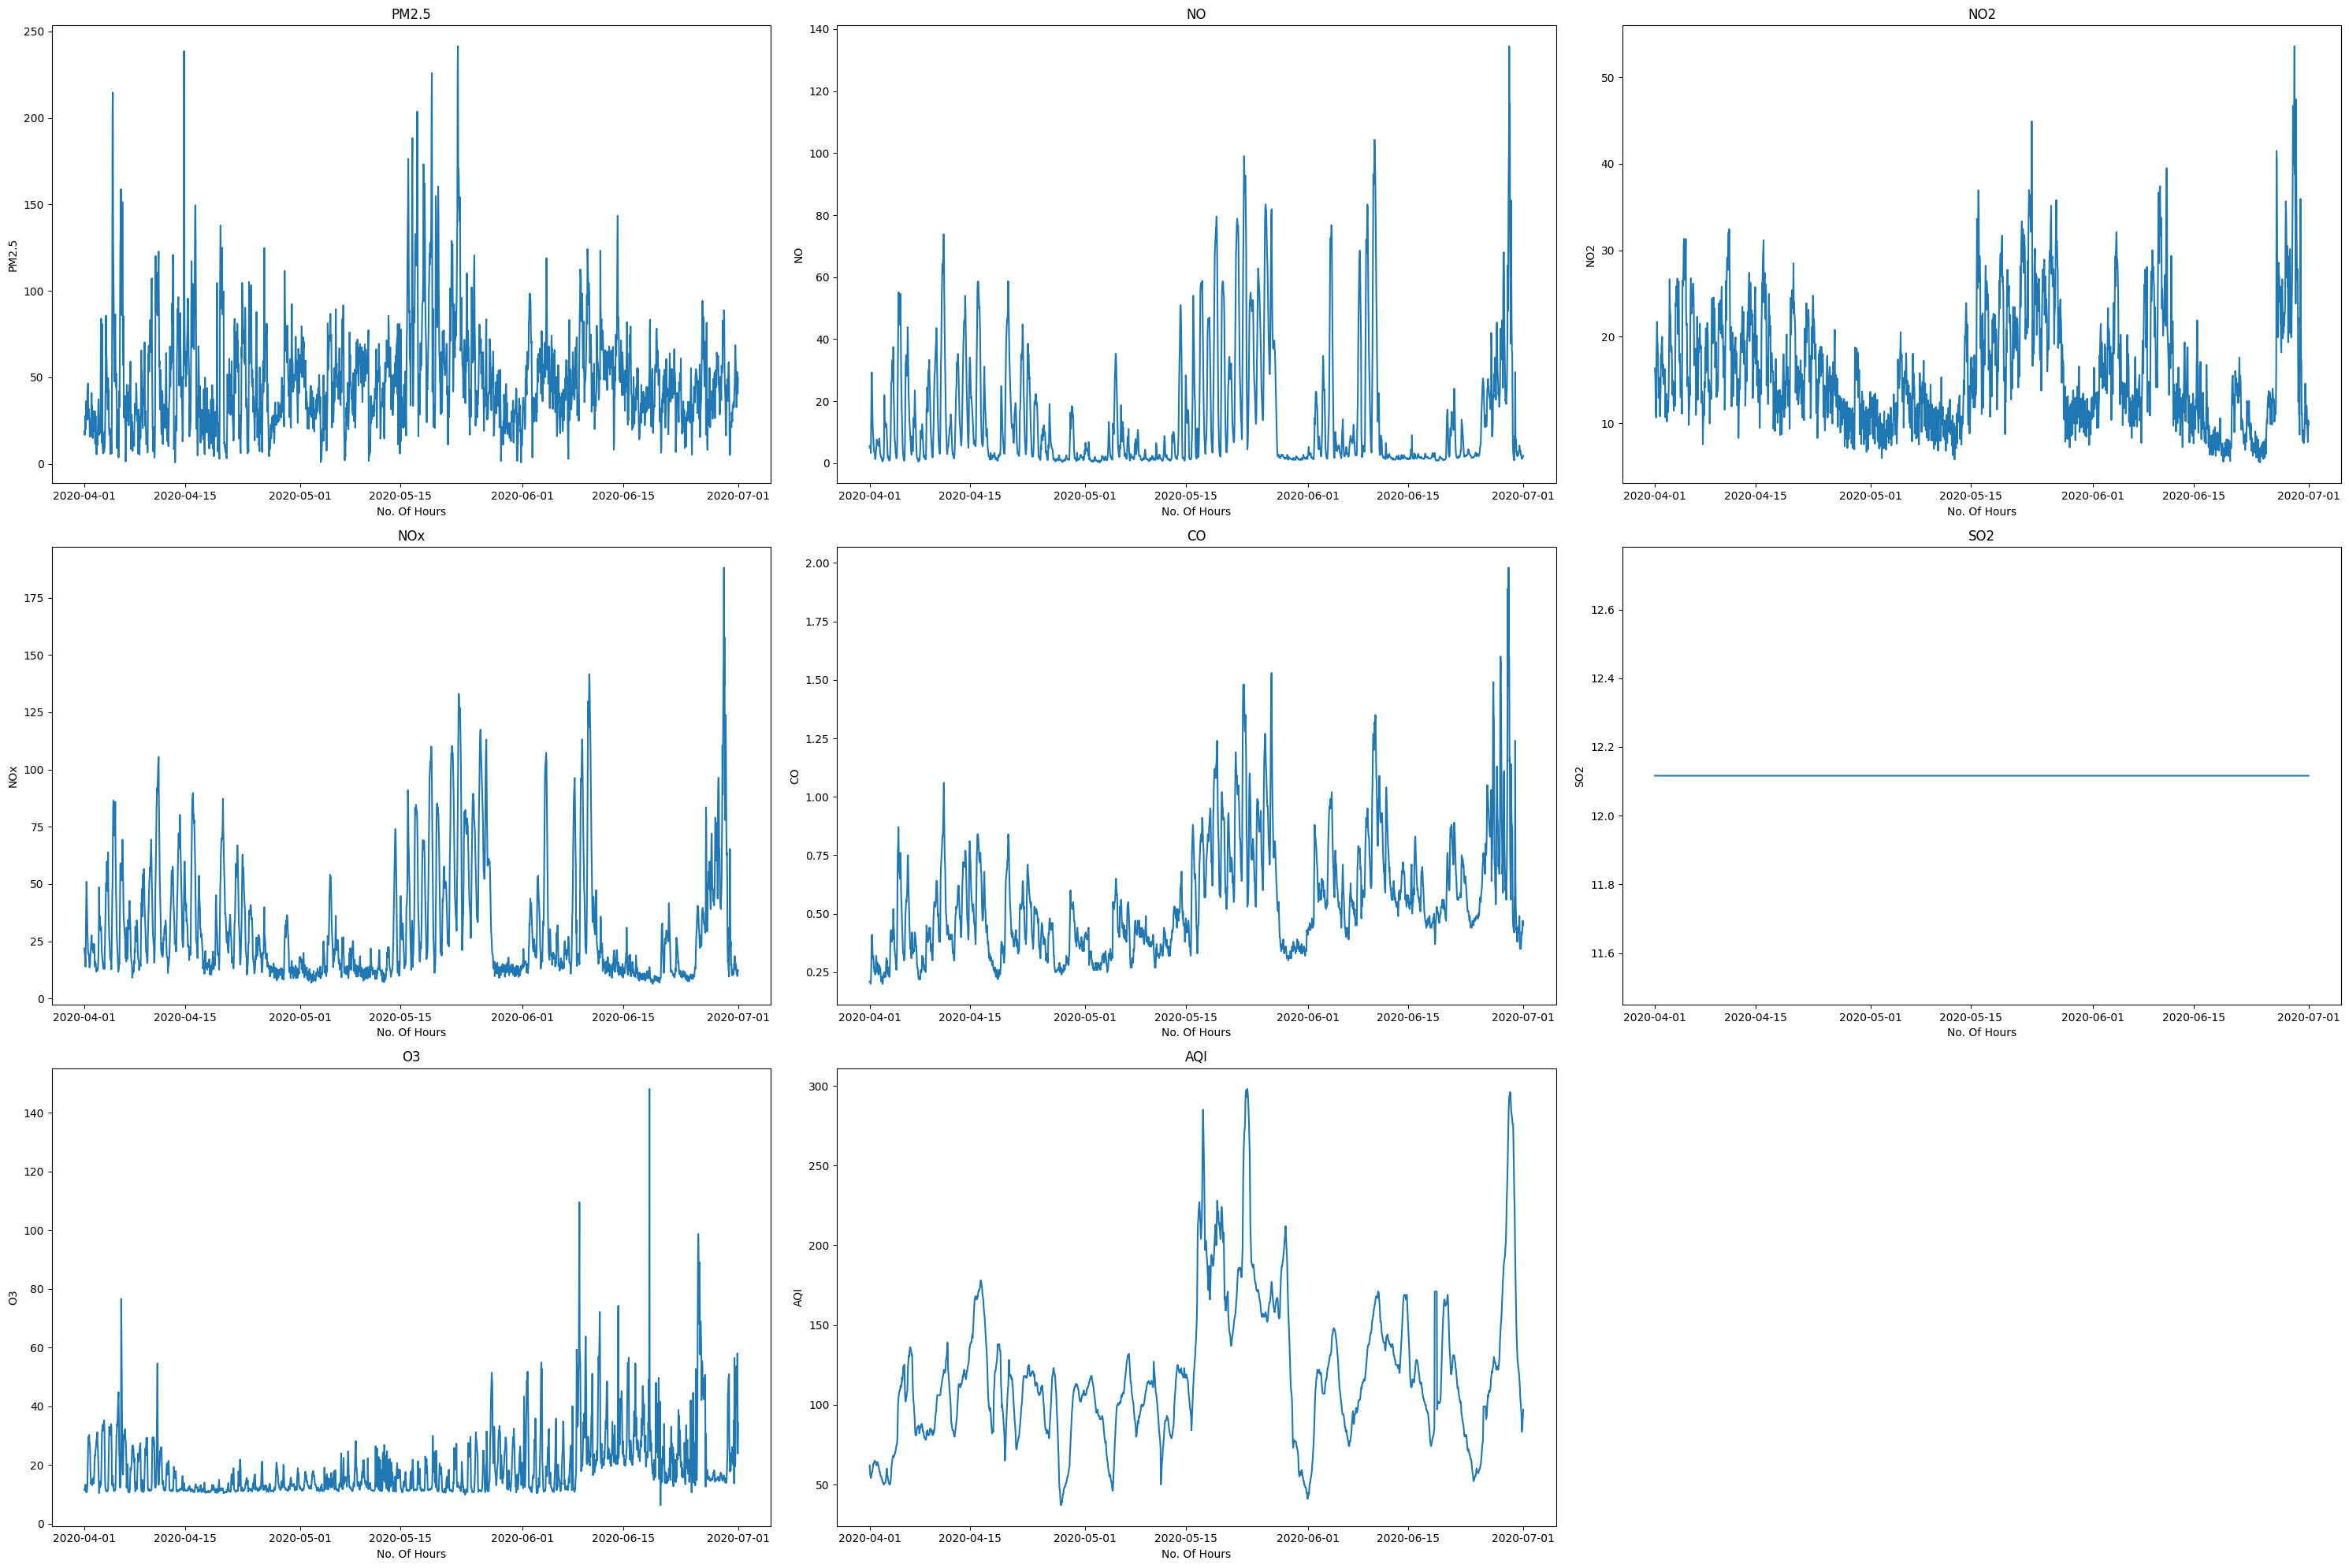

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2185 entries, 2020-04-01 00:00:00 to 2020-07-01 00:00:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   2185 non-null   float64
 1   NO      2185 non-null   float64
 2   NO2     2185 non-null   float64
 3   NOx     2185 non-null   float64
 4   CO      2185 non-null   float64
 5   SO2     2185 non-null   float64
 6   O3      2185 non-null   float64
 7   AQI     2185 non-null   float64
dtypes: float64(8)
memory usage: 153.6 KB


In [50]:

DL007Data['Date'] = DL007Data.index
DL007Data['Year'] = DL007Data['Date'].dt.year
DL007Data['Month'] = DL007Data['Date'].dt.month

DL007Data = DL007Data.loc[DL007Data['Year'] >= 2020].drop(['Year'], axis = 1)

DL007Data = DL007Data.loc[DL007Data['Month'] >= 4].drop(['Month', 'Date'], axis = 1)

plt.figure(figsize=(30,20))

for index, column in enumerate(DL007Data.columns.tolist()[:]):
    plt.subplot(3, 3, index + 1)
    plt.plot(DL007Data[column])
    plt.xlabel('No. Of Hours')
    plt.ylabel(column)
    plt.title(column)


plt.tight_layout()
plt.show()

DL007Data.info()



## Setting up the prediction model 

This prediction model is going to use a LSTM network

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = scaler.fit_transform(DL007Data) 
data2 = scaler.inverse_transform(data[1: 8]) #size 13129
#Making the data in a more divisible number

X = []
y = []

sequenceLength = 48 #148 #7 day worth of data for 1 hour worth of prediction

for i in range(len(data) - sequenceLength):
    X.append(data[i: i + sequenceLength])
    y.append(data[i + sequenceLength])

import numpy as np 

X = np.array(X)
y = np.array(y)

originalShape = X.shape
#generating the sequence of data for the LTSM to train from 
X = X.reshape(X.shape[0], -1)

from sklearn.model_selection import train_test_split

X, Xval, y, yval = train_test_split(X, y, shuffle = True, test_size=0.2)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle = True)
#Split the data 

Xtrain, ytrain = np.array(Xtrain), np.array(ytrain)

Xtest, ytest = np.array(Xtest), np.array(ytest)

Xval, yval = np.array(Xval), np.array(yval)


Xtrain = Xtrain.reshape(Xtrain.shape[0], originalShape[1], originalShape[2])

Xtest = Xtest.reshape(Xtest.shape[0], originalShape[1], originalShape[2])

Xval = Xval.reshape(Xval.shape[0], originalShape[1], originalShape[2])


In [52]:
ytrain.shape

(1281, 8)

In [53]:
#Before we get onto building the LTSM we need to transform our 3 dimensional array 

sequence, items, rows = Xtrain.shape

Xtrain = Xtrain.reshape(sequence, rows, items)

sequence, items, rows = Xtest.shape

Xtest = Xtest.reshape(Xtest.shape[0], rows, items)

Xval = Xval.reshape(Xval.shape[0], rows, items)

#Here comes the best part! Starting up the model 

#Xtrain.shape

Xval.shape

(428, 8, 48)

In [71]:
#Standard LSTM model 

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
import keras 

shape = Xtrain.shape

LSTMmodel = Sequential()

LSTMmodel.add(LSTM(units=250, activation = 'sigmoid', input_shape= Xtrain.shape[1:], dropout = 0.2))
LSTMmodel.add(Dense(units=8)) 

LSTMmodel.compile(optimizer= Adam(learning_rate=0.005), loss='mean_squared_error', metrics = ['mae'])

LSTMmodel.fit(Xtrain, ytrain, epochs = 5, batch_size = 20, validation_data = (Xval, yval))

#LSTMmodel.predict(Xtest, ytest)
Xtest.shape

Epoch 1/5
65/65 [==============================] - 11s 48ms/step - loss: 0.3131 - mae: 0.3619 - val_loss: 0.1786 - val_mae: 0.2598
Epoch 2/5
65/65 [==============================] - 2s 35ms/step - loss: 0.2012 - mae: 0.2727 - val_loss: 0.1592 - val_mae: 0.2411
Epoch 3/5
65/65 [==============================] - 2s 34ms/step - loss: 0.1965 - mae: 0.2677 - val_loss: 0.1435 - val_mae: 0.2240
Epoch 4/5
65/65 [==============================] - 2s 34ms/step - loss: 0.1924 - mae: 0.2656 - val_loss: 0.1485 - val_mae: 0.2271
Epoch 5/5
65/65 [==============================] - 2s 36ms/step - loss: 0.1902 - mae: 0.2632 - val_loss: 0.1599 - val_mae: 0.2382


(428, 8, 48)

In [55]:
from sklearn.metrics import mean_squared_error

ypredict = LSTMmodel.predict(Xtest)

mean_squared_error(ypredict, ytest)

14/14 [==============================] - 0s 5ms/step


0.18932421623082452

In [64]:
#Convolution LSTM model

Xtrainc = Xtrain.reshape(Xtrain.shape[0], 1, 8, sequenceLength )
Xtestc = Xtest.reshape(Xtest.shape[0], 1, 8, sequenceLength )
Xvalc = Xval.reshape(Xval.shape[0], 1, 8, sequenceLength )

ConvLSTMmodel = Sequential()


ConvLSTMmodel.add(keras.layers.ConvLSTM1D(filters = 64, kernel_size = 1, input_shape= (1, shape[1], shape[2]), padding = 'same'))
ConvLSTMmodel.add(keras.layers.Flatten())
ConvLSTMmodel.add(Dense(units=8)) 
ConvLSTMmodel.compile(optimizer= Adam(learning_rate=0.005), loss='mean_squared_error', metrics = ['mae'])

results2 = ConvLSTMmodel.fit(Xtrainc, ytrain, epochs = 5, batch_size = 20, validation_data = (Xvalc, yval))

Epoch 1/5
65/65 [==============================] - 5s 14ms/step - loss: 0.3176 - mae: 0.3634 - val_loss: 0.1942 - val_mae: 0.2800
Epoch 2/5
65/65 [==============================] - 0s 7ms/step - loss: 0.1696 - mae: 0.2538 - val_loss: 0.1454 - val_mae: 0.2337
Epoch 3/5
65/65 [==============================] - 0s 7ms/step - loss: 0.1371 - mae: 0.2234 - val_loss: 0.1331 - val_mae: 0.2261
Epoch 4/5
65/65 [==============================] - 0s 6ms/step - loss: 0.1269 - mae: 0.2149 - val_loss: 0.1299 - val_mae: 0.2219
Epoch 5/5
65/65 [==============================] - 0s 6ms/step - loss: 0.1104 - mae: 0.2007 - val_loss: 0.1320 - val_mae: 0.2266


In [74]:
#Bidirectional LSTM model 

BiLSTMmodel = Sequential()


#ConvLSTMmodel.add(keras.layers.ConvLSTM1D(filters = 64, kernel_size = 1, input_shape= (1, shape[1], shape[2]), kernel_regularizer=keras.regularizers.l2(), padding = 'same'))

BiLSTMmodel.add(keras.layers.Conv1D(filters = 128, kernel_size = 1, input_shape= (shape[1], shape[2]), kernel_regularizer=keras.regularizers.l2(), padding = 'same'))
BiLSTMmodel.add(keras.layers.MaxPooling1D())

BiLSTMmodel.add(keras.layers.Bidirectional(LSTM(units = 64, dropout= 0.2, return_sequences=True)))
BiLSTMmodel.add(keras.layers.Bidirectional(LSTM(units = 64, dropout= 0.2)))

BiLSTMmodel.add(Dense(units=8)) 
BiLSTMmodel.compile(optimizer= Adam(learning_rate=0.005), loss='mean_squared_error', metrics = ['mae'])

results3 = BiLSTMmodel.fit(Xtrain, ytrain, epochs = 5, batch_size = 20, validation_data = (Xval, yval))

Epoch 1/5
65/65 [==============================] - 14s 62ms/step - loss: 0.6944 - mae: 0.4301 - val_loss: 0.4291 - val_mae: 0.3800
Epoch 2/5
65/65 [==============================] - 2s 35ms/step - loss: 0.3574 - mae: 0.3435 - val_loss: 0.3863 - val_mae: 0.3833
Epoch 3/5
65/65 [==============================] - 2s 30ms/step - loss: 0.3177 - mae: 0.3312 - val_loss: 0.3041 - val_mae: 0.3186
Epoch 4/5
65/65 [==============================] - 2s 30ms/step - loss: 0.2782 - mae: 0.3006 - val_loss: 0.2617 - val_mae: 0.2866
Epoch 5/5
65/65 [==============================] - 3s 49ms/step - loss: 0.2366 - mae: 0.2787 - val_loss: 0.2342 - val_mae: 0.2726


In [78]:
#GRU Model 

GRUmodel = Sequential()

GRUmodel.add(keras.layers.GRU(units=250, activation = 'sigmoid', input_shape= Xtrain.shape[1:], dropout = 0.2))
GRUmodel.add(Dense(units=8)) 

GRUmodel.compile(optimizer= Adam(learning_rate=0.005), loss='mean_squared_error', metrics = ['mae'])

results4 = GRUmodel.fit(Xtrain, ytrain, epochs = 5, batch_size = 20, validation_data = (Xval, yval))


Epoch 1/5
65/65 [==============================] - 5s 43ms/step - loss: 0.3512 - mae: 0.3798 - val_loss: 0.1746 - val_mae: 0.2553
Epoch 2/5
65/65 [==============================] - 2s 36ms/step - loss: 0.1986 - mae: 0.2744 - val_loss: 0.1478 - val_mae: 0.2253
Epoch 3/5
65/65 [==============================] - 3s 42ms/step - loss: 0.1908 - mae: 0.2703 - val_loss: 0.1548 - val_mae: 0.2462
Epoch 4/5
65/65 [==============================] - 2s 35ms/step - loss: 0.1861 - mae: 0.2679 - val_loss: 0.1442 - val_mae: 0.2334
Epoch 5/5
65/65 [==============================] - 2s 33ms/step - loss: 0.1825 - mae: 0.2589 - val_loss: 0.1499 - val_mae: 0.2356


In [76]:
#Setting up the data for the prediction 
predictionData = DL007Data.iloc[-(sequenceLength + 24):-24]
resultsData = DL007Data.iloc[-24:-1]


def makeDailyPrediction(model, data, convLSTM = False):
    dataGathered = []
    data = scaler.inverse_transform(data).T

    for i in range(24):

        if not convLSTM: 
            ypredict = model.predict(np.array([data]))
        else:
            ypredict = model.predict(np.array([[data]]))

        dataGathered.append(ypredict[0])
        data = np.concatenate([data[:, 1:], ypredict.T], axis = 1)
    
    
    dataGathered = scaler.inverse_transform(np.array(dataGathered))

    predictionDataframe = pd.DataFrame(dataGathered, columns = DL007Data.columns)
    predictionDataframe['Date'] = predictionData.iloc[-24:].index  + pd.DateOffset(hours = 24)
    predictionDataframe = predictionDataframe.set_index('Date')

    return predictionDataframe

prediction1 = makeDailyPrediction(LSTMmodel, predictionData)
prediction2 = makeDailyPrediction(ConvLSTMmodel, predictionData, convLSTM = True)
prediction3 = makeDailyPrediction(BiLSTMmodel, predictionData)
prediction4 = makeDailyPrediction(GRUmodel, predictionData)

1/1 [==============================] - 0s 27ms/step


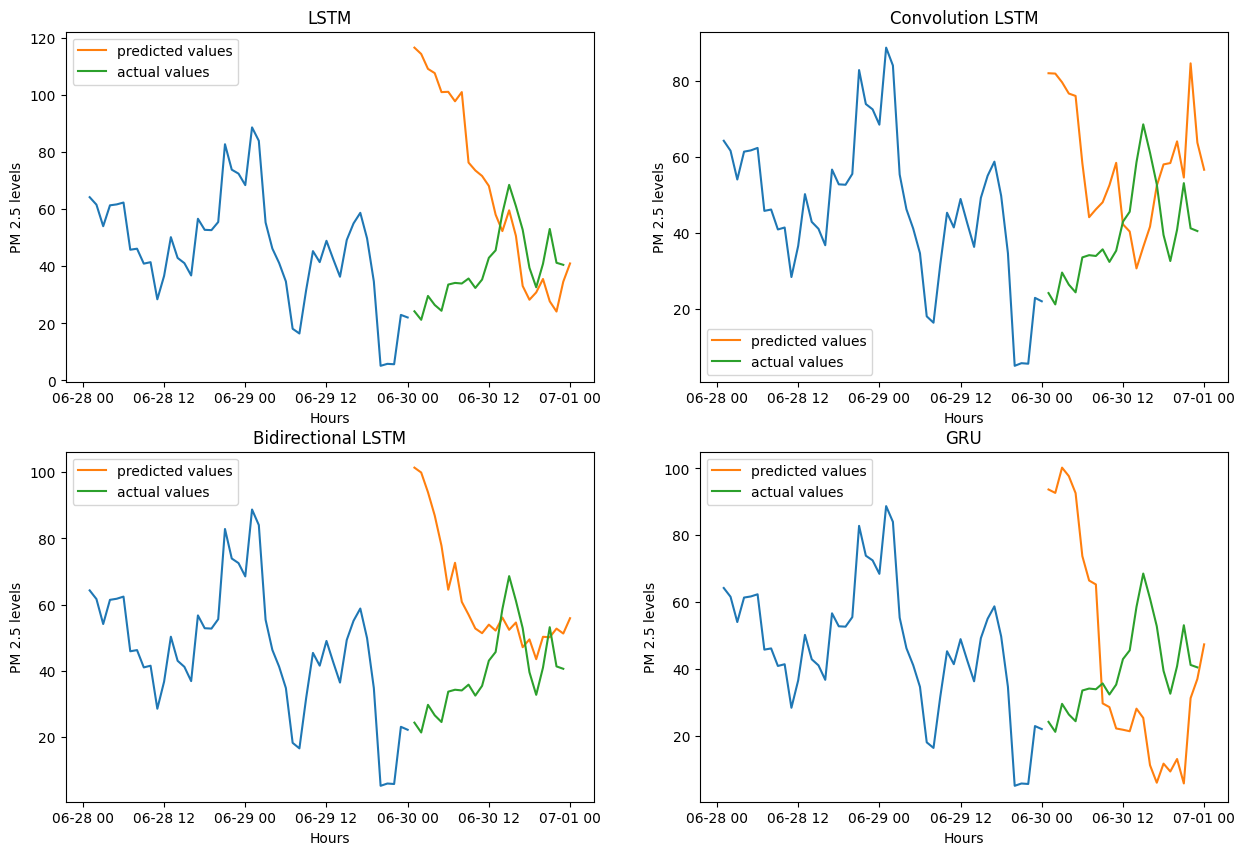

In [79]:
plt.figure(figsize=(15,10))
predictionList = [prediction1, prediction2, prediction3, prediction4]
nameList = ['LSTM', 'Convolution LSTM', 'Bidirectional LSTM', 'GRU']


for index, predictionResult in enumerate(predictionList):
    plt.subplot(2, 2, index + 1)
    plt.plot(predictionData['PM2.5'])
    plt.plot(predictionResult['PM2.5'], label = 'predicted values')
    plt.plot(resultsData['PM2.5'], label = 'actual values')
    plt.ylabel('PM 2.5 levels')
    plt.xlabel('Hours')
    plt.title(nameList[index])
    plt.legend()
